orginal y_train:  [5 0 4 ... 5 6 8]
Examples of test images


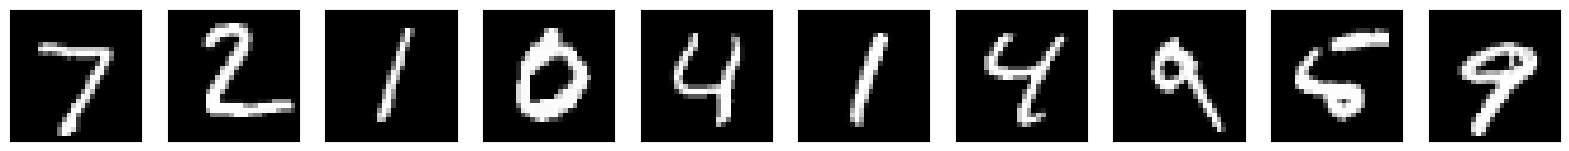

(60000, 28, 28, 1)
(60000, 10)
60000
10000
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from __future__ import print_function
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras import backend as K
from matplotlib import pyplot as plt

# Utility function for showing images
def show_imgs(x_test, n=10):
    sz = x_test.shape[1]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(sz,sz))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Pre-process inputs
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('orginal y_train: ', y_train)
# Convert class indices to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('Examples of test images')
show_imgs(x_test)



print(x_train.shape)
print(y_train.shape)
print(len(x_train))
print(len(x_test))
print(y_test)


Questions 1.1


What is the input shape?

A: we get this by printing the shape and by doing so we get that the input shape is 28x28x1 which mean a gray scale 2D image of size 28x28


How many training examples are there?

A: There is 60000 trianing examples


How many test examples are there?

A: There is 10000 test examples


What does to_categorical do? (Hint: print y_test before and after applying to_categorial)

A: It one hot encodes our labels to represent the right class with a 1 at specific location in our vector while the remaining values become 0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

tensorflow.random.set_seed(0) # make weight initialization deterministic

# Model
model = Sequential()
model.add(Flatten(input_shape=input_shape)) # input_shape is (28, 28, 1)
model.add(Dense(num_classes)) # num_classes is 10
model.add(Activation('softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Questions 2.1

What do you think the Flatten() layer does, and why is it necessary to have it here?

A: The flatten layer simply convert the 2d image to an array with 28*28 = 784 values with one value from each pixel in the image to 1,n array with one pixel value at each index


What do you think the Dense() layer does, and why does it have 7850 parameters?

A: the dense layer is a layer which calcculates the dotproduct(inner product) between the input values and the aplied kernes and then sends this thorugh a predifined activation function in our case af softmax function. The number of parameters is given by:  outputs_shape(10) * (input_shape+1)(784+1) = number_parameters


What do you think Activation() does, and why is its argument set to "softmax"?

A: The softmax is the activation function which takes input numerical values and return probabilites so it alows us to normalize so that all the values in one label summed gives 1. This means that we get probabilities of the image belonging to each class  

In [ ]:
batch_size = 128
epochs = 10

# Compile the model before training
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.2695 - accuracy: 0.7062 - val_loss: 0.8036 - val_accuracy: 0.8307
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7121 - accuracy: 0.8418 - val_loss: 0.6035 - val_accuracy: 0.8612
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5844 - accuracy: 0.8612 - val_loss: 0.5229 - val_accuracy: 0.8743
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5232 - accuracy: 0.8702 - val_loss: 0.4780 - val_accuracy: 0.8814
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4860 - accuracy: 0.8763 - val_loss: 0.4485 - val_accuracy: 0.8854
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4605 - accuracy: 0.8806 - val_loss: 0.4276 - val_accuracy: 0.8899
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4416 - accuracy: 0.8840 - val_loss: 0.4117 - val_accuracy: 0.8932
Epoch 

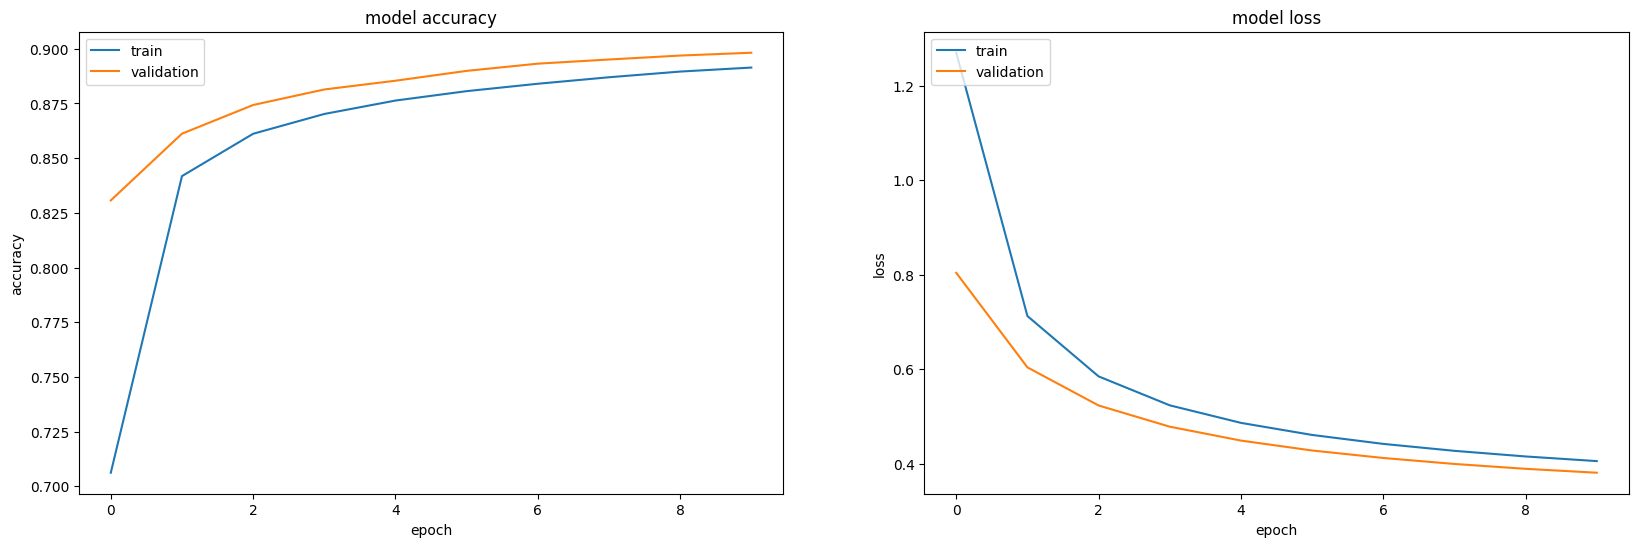

In [ ]:
import matplotlib.pyplot as plt

def show_history(history):
  plt.figure(figsize=(20,6))

  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')

  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_history(history)

In [ ]:
import numpy as np

np.random.seed(0) # make it deterministic

# create smaller training set
digit_indices = np.asarray([np.where(np.argmax(y_train,axis=1) == i)[0][np.random.randint(0,5000,10)] for i in range(num_classes)]).flatten()
x_train_small = x_train[digit_indices,:]
y_train_small = y_train[digit_indices,:]

--- training tool 71.9035279750824 seconds ---
Validation loss: 1.0107015371322632
Validation accuracy: 0.7340999841690063


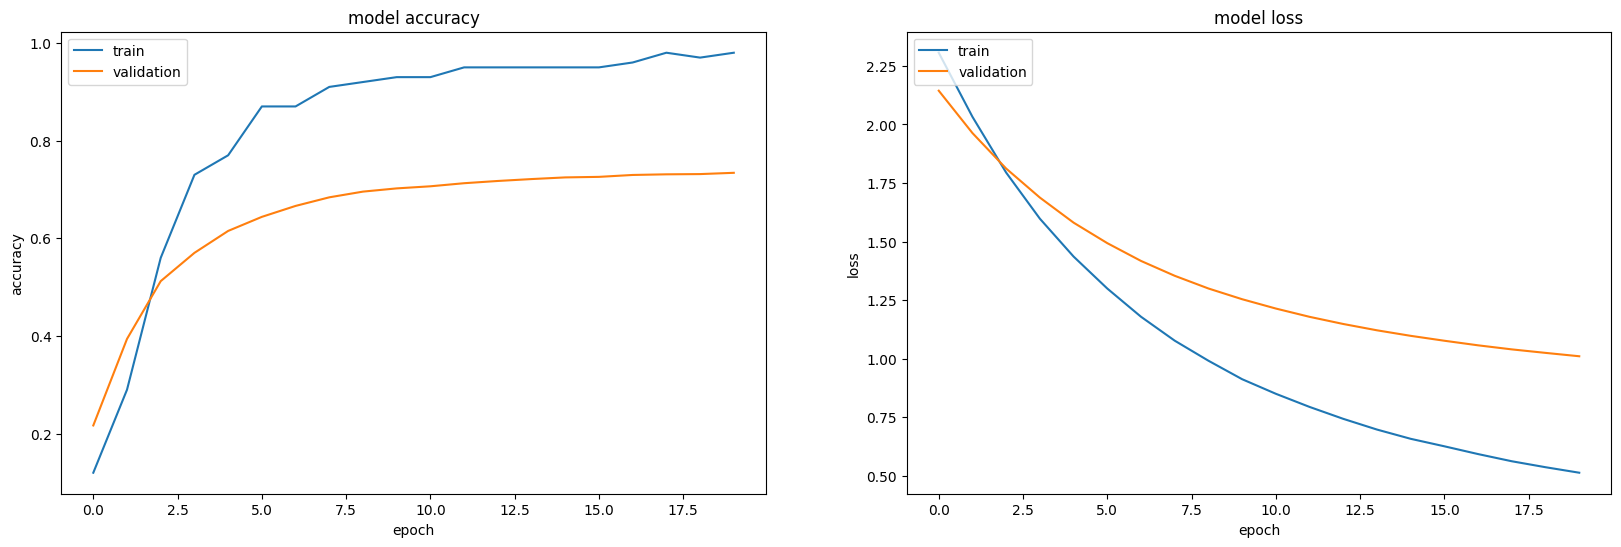

In [ ]:
import time

batch_size = 5 # Cannot use 128 like before, because we only have 100 samples (10 from each class) 5 originally
epochs = 20 # We need more epochs because we have fewer training samples

tensorflow.random.set_seed(0)

# Model (redefine the model in order to reinitialize the weights to random values)
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model before training
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model (this will take a little while. Set verbose to 1 if you want to see how training progresses)
start_time = time.time()
history = model.fit(x_train_small, y_train_small,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            verbose=0,
            shuffle=True)
print("--- training tool %s seconds ---" % (time.time() - start_time))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot old vs new loss
show_history(history)

Question 2.2


Our new model performs worse than the baseline model. Why?

A: we reduced the amount of data and thereby the number of rerpesentation of each class which in return makes the model unable to learn a broad range of feartures for each class, thereby reducing the feature space making it less gneralizable for multipple rerpesentations of the same class/objects this results in a model where we do not generalize well of validation or test data, while continuing to learn based on our training data which gives us an overfitted model


This puzzle is supposed to make you speculate. You are not required to get the answers right at this stage of the course. Temporarily set the number of epochs to 10 to make experimentation faster.


however Advantages of using a small batch size is that it Requires less memory since you are training using less samples each iteration; Typically networks learn faster (in a smaller # of epochs) with mini-batches since the weights are updated more often. Disadvantages: The smaller the batch the less accurate the estimate of the gradient will be. Processing smaller batches might add up some computational overhead to your training procedure, depending on the hardware.



How does training behave when we set the batch size to the values listed below?

Compare the loss curves and the training times and see if you can figure out

why they differ the way they do. Use these batch sizes:


- 1 (lowest possible)


- 5 (low)


- 20 (medium)


- 100 (highest possible)


Above, we changed the batch size and the number of epochs. Are these hyperparameters or learnable parameters? Btw., what are the learnable parameters of our model (y = softmax(W*x + b))?


Which criteria would you pick to determine the "optimal" combination of batch size and number of epochs?


I would pick thw lowest validation loss validation loss as this is the loss used for hyperparameter optimization. This dataset is presented to the model a much smaller  number of times (one time pr. epoch) than the training.

--- training tool 341.7305347919464 seconds ---
Validation loss: 0.8048924207687378
Validation accuracy: 0.7488999962806702


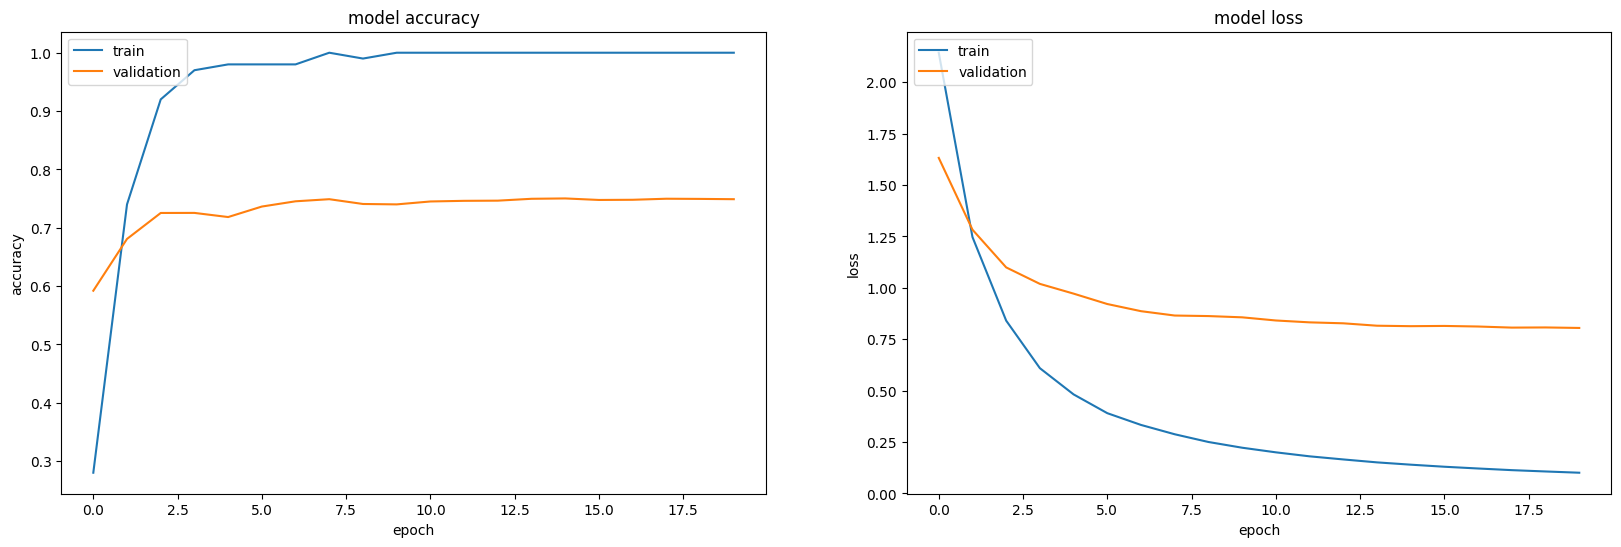

In [ ]:
import time

batch_size = 1 # Cannot use 128 like before, because we only have 100 samples (10 from each class) 5 originally
epochs = 20 # We need more epochs because we have fewer training samples

tensorflow.random.set_seed(0)

# Model (redefine the model in order to reinitialize the weights to random values)
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model before training
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model (this will take a little while. Set verbose to 1 if you want to see how training progresses)
start_time = time.time()
history = model.fit(x_train_small, y_train_small,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            verbose=0,
            shuffle=True)
print("--- training tool %s seconds ---" % (time.time() - start_time))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot old vs new loss
show_history(history)

--- training tool 20.838473796844482 seconds ---
Validation loss: 1.5770238637924194
Validation accuracy: 0.6402999758720398


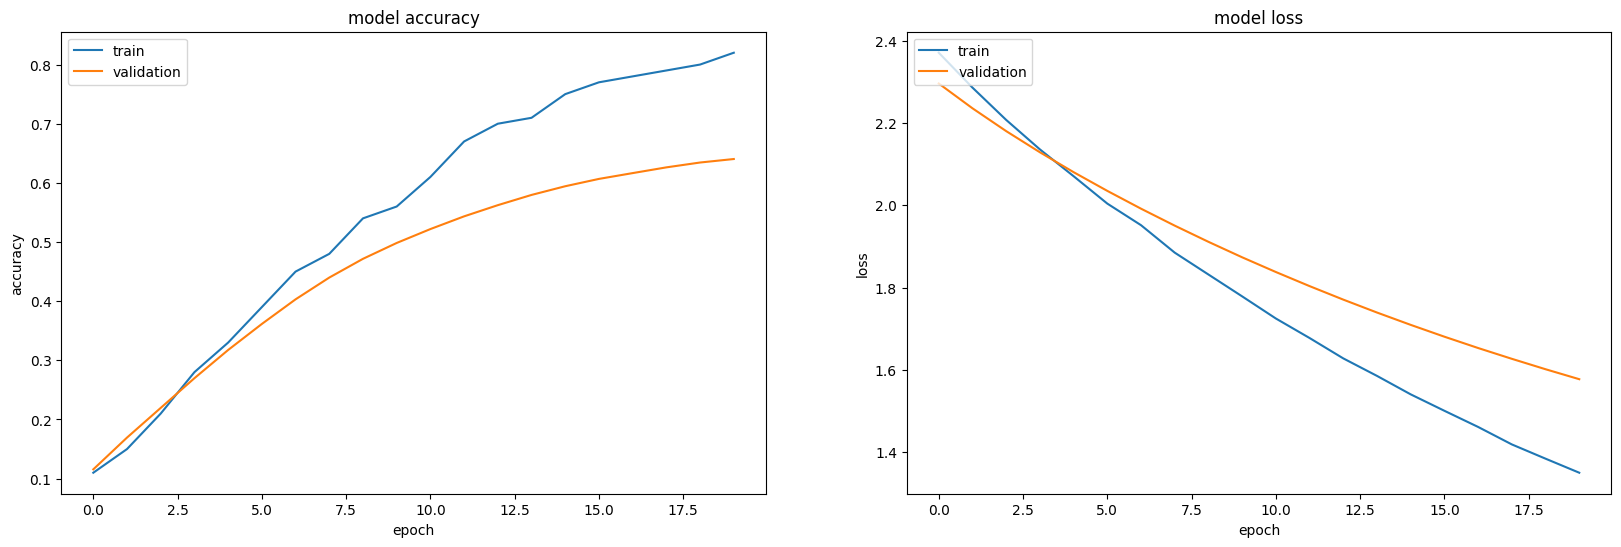

In [ ]:
import time

batch_size = 20 # Cannot use 128 like before, because we only have 100 samples (10 from each class) 5 originally
epochs = 20 # We need more epochs because we have fewer training samples

tensorflow.random.set_seed(0)

# Model (redefine the model in order to reinitialize the weights to random values)
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model before training
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model (this will take a little while. Set verbose to 1 if you want to see how training progresses)
start_time = time.time()
history = model.fit(x_train_small, y_train_small,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            verbose=0,
            shuffle=True)
print("--- training tool %s seconds ---" % (time.time() - start_time))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot old vs new loss
show_history(history)

--- training tool 5.469794034957886 seconds ---
Validation loss: 2.145596504211426
Validation accuracy: 0.23960000276565552


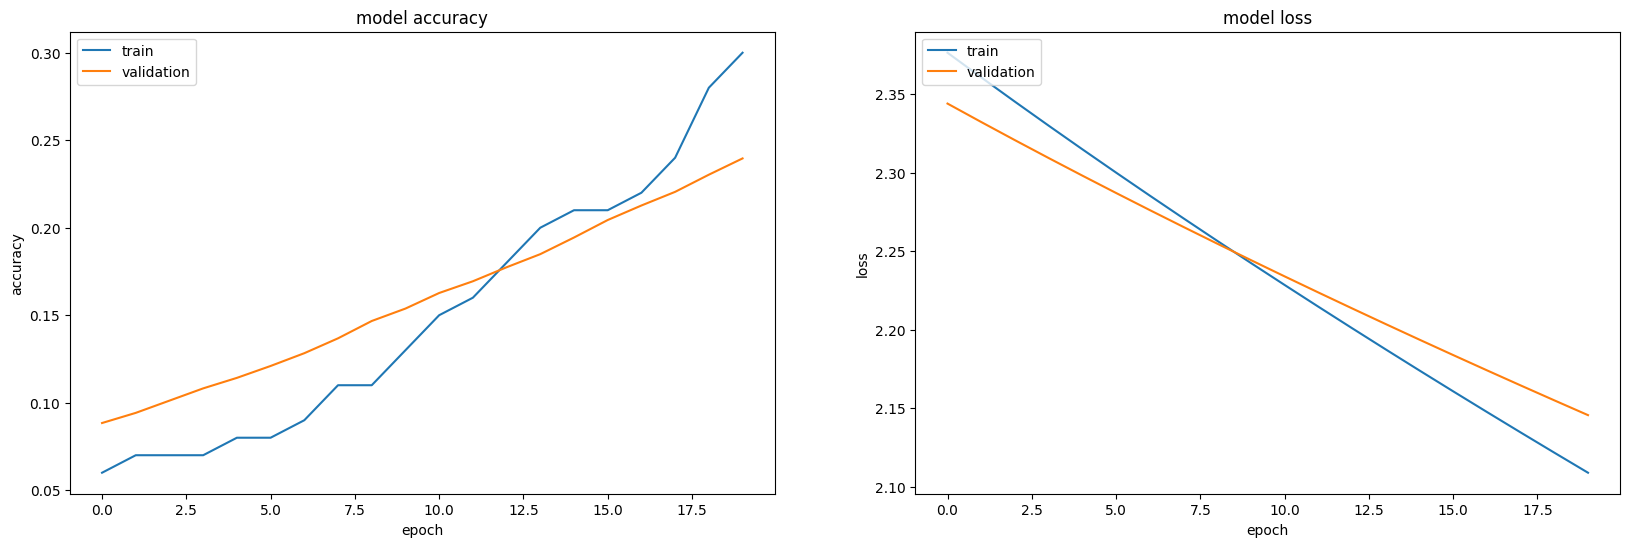

In [ ]:
import time

batch_size = 100 # Cannot use 128 like before, because we only have 100 samples (10 from each class) 5 originally
epochs = 20 # We need more epochs because we have fewer training samples

tensorflow.random.set_seed(0)

# Model (redefine the model in order to reinitialize the weights to random values)
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model before training
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model (this will take a little while. Set verbose to 1 if you want to see how training progresses)
start_time = time.time()
history = model.fit(x_train_small, y_train_small,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            verbose=0,
            shuffle=True)
print("--- training tool %s seconds ---" % (time.time() - start_time))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot old vs new loss
show_history(history)

Task 2.2: Finding a better learning rate
The learning rate is another hyperparameter that we can tweak.

Training with the default learning rate (which is 0.01) is rather slow. Your task is to find a better learning rate that makes the model converge faster, without comprimising the model's accuracy on the validation set. With a proper learning rate you should be able to achieve 74-75% accuracy in just 10 epochs (instead of 20 as above).

You can adjust the learning rate by setting the learning_rate argument of keras.optimizer.SGD:

keras.optimizers.SGD(learning_rate=0.01)
Optional bonus questions: What happens if you set the learning rate way too low (e.g. 0.0001)?

Validation loss: 0.80491042137146
Validation accuracy: 0.7494999766349792
Loss curves with old learning rate (0.01)


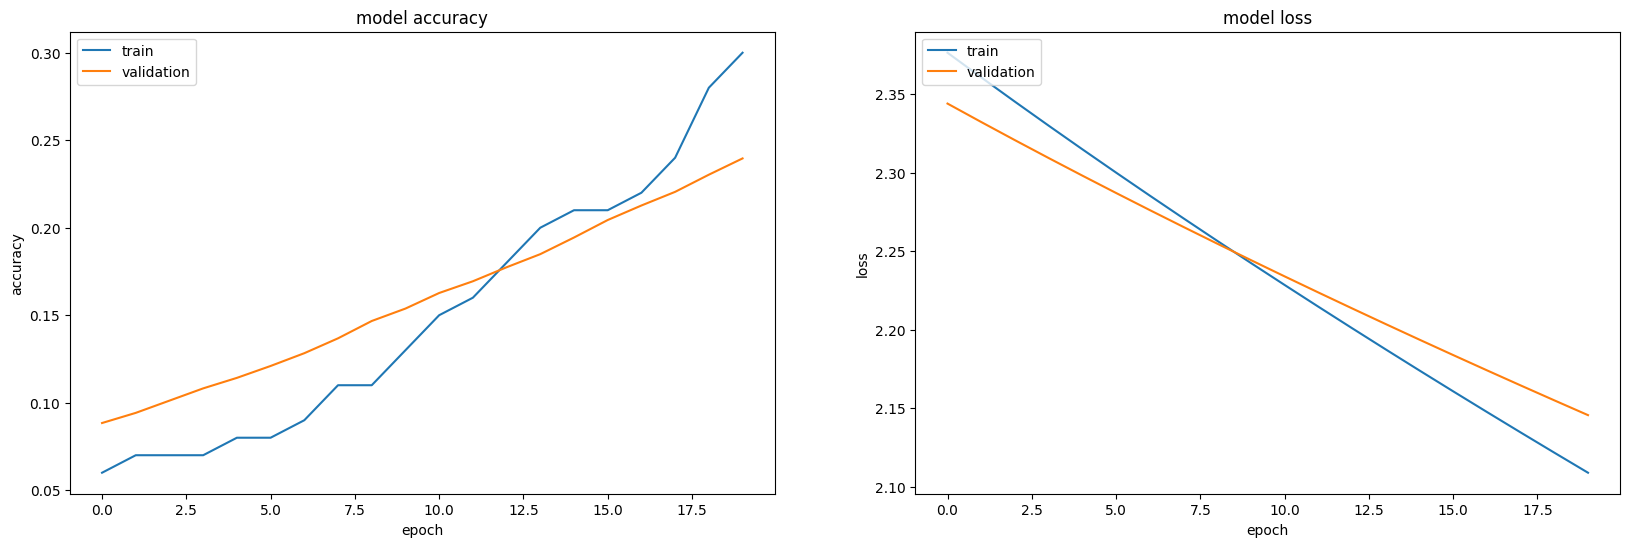

Loss curves with new learning rate (0.1)


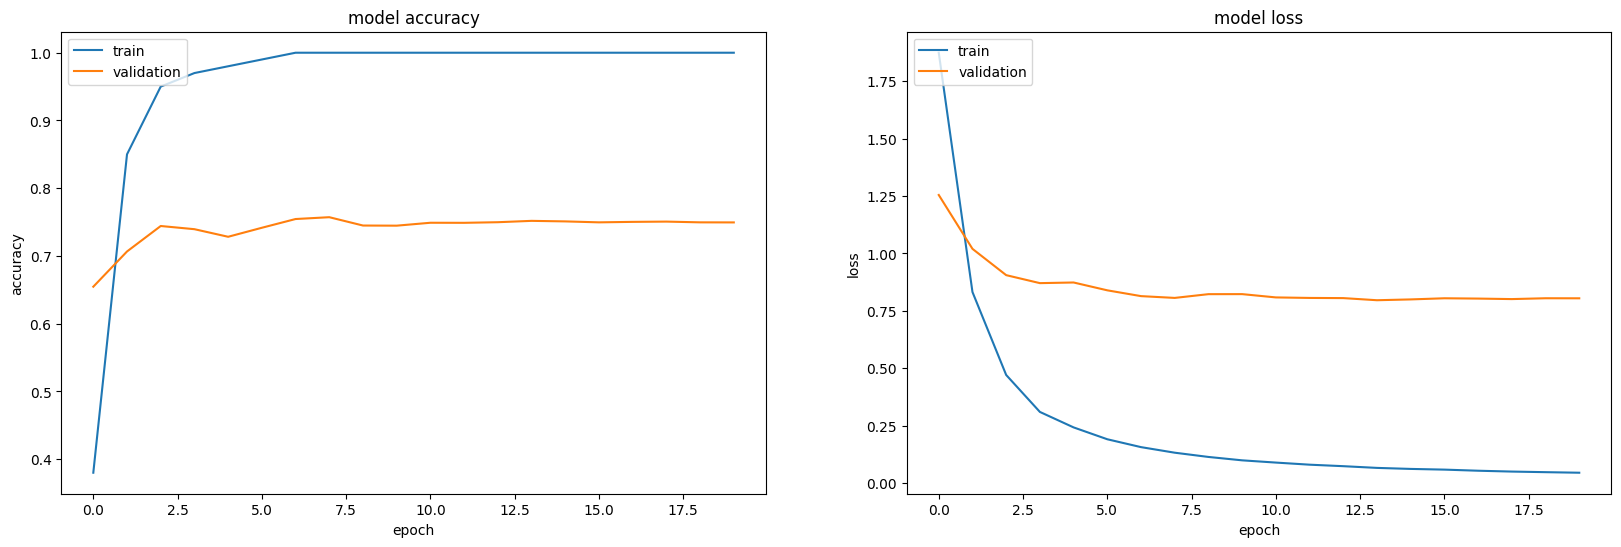

In [ ]:
batch_size = 5
epochs = 20

tensorflow.random.set_seed(0)

# Model (we redefine it in order to reinitialize the weights to random values)
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model before training
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model (this will take a little while. Set verbose to 1 if you want to see how training progresses)
history_lr = model.fit(x_train_small, y_train_small,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            verbose=0,
            shuffle=True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot old vs new loss
print("Loss curves with old learning rate (0.01)")
show_history(history)
print("Loss curves with new learning rate (0.1)")
show_history(history_lr)


Task 2.3: Displaying the learned weights
In the case of softmax regression there is a very intuitive interpretation of the learned weights of the coefficient matrix W, as you will see below.

First, your task is to extract the weights of the coefficient matrix from the model (i.e. the Dense layer) and display each row as an image.

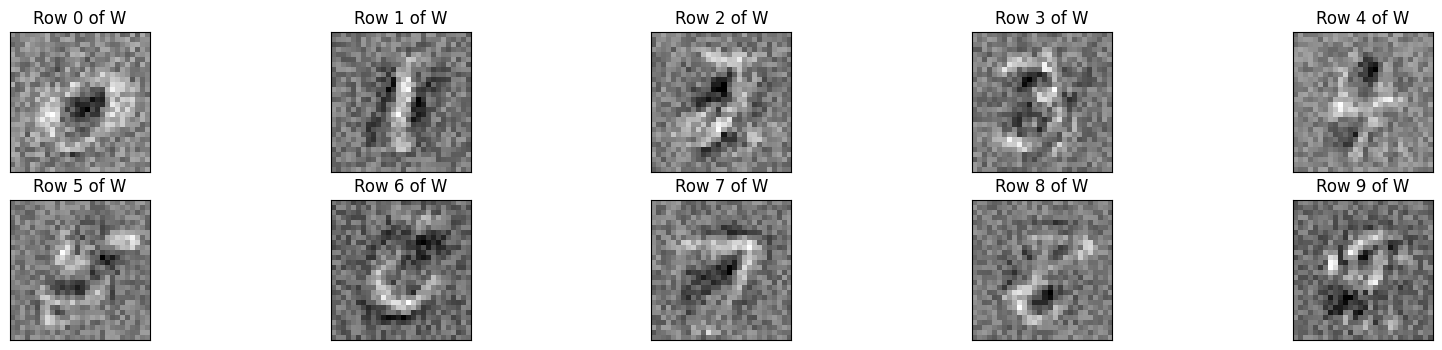

In [ ]:
layer = model.layers[1]
W = layer.get_weights()[0]
W = W.reshape((28,28,10)) # there are 10 classes and one 28x28 weight image per class
plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(W[:,:,i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()
  plt.title(f'Row {i} of W')

Questions 2.3
How do we interpret the weights?
In some regions the weights are very noisy. What could be the consequences of that?


A: W has one row per class (shape 10x784). The product Wx outputs a 10x1 vector, where the i'th element is the inner product between input x and the i'th row of W. Recall that the inner product is a kind of similarity measure. Hence, the rows of W act as a kind of "templates" - one for each digit - that we compare the input against. Which ever template matches best with x is going to determine which class the model predicts for x.


A:
The noisy regions at the borders of the weight images correspond to portions where we have no training data (because the input image intensities tend to be close to 0 near the borders). It is undefined how the model behaves if it actually sees data in these noisy regions. A consequence of this could be that if you input a noisy test image, the model's prediction is going to be incorrect. In other words, the noise in the weights may hamper the ability of the model to generalize to unseen data. This is called overfitting...


Task 2.4: Weight decay (or L2 regularization)
With only 10 observations per class in our training data set, it is very likely that our model overfits the training data. This leads to poor generalization (i.e., the model doesn't work that well on unseen data).

One way to address overfitting is by means of regularization. The best kind of regularization is "adding more data" (of course). This is the reason that our baseline model performs better than the current model.

One possible regularization strategy is to use weight decay. So let's modify the loss function of the model by adding an L2 regularization term. The regularization term is added using an extra parameter to the Dense layer.

Please note that the weight of the penalty term (lamda) has been set rather high in the example below. As a consequence, you will actually see a small decrease in validation accuracy. But as you will see later, weight decay has dramatic effect on the learned weights (W). By the way, lambda is yet another hyperparameter that we could tweak to make our model perform better.

Validation loss: 1.6380558013916016
Validation accuracy: 0.7013999819755554
Loss curves with regularization


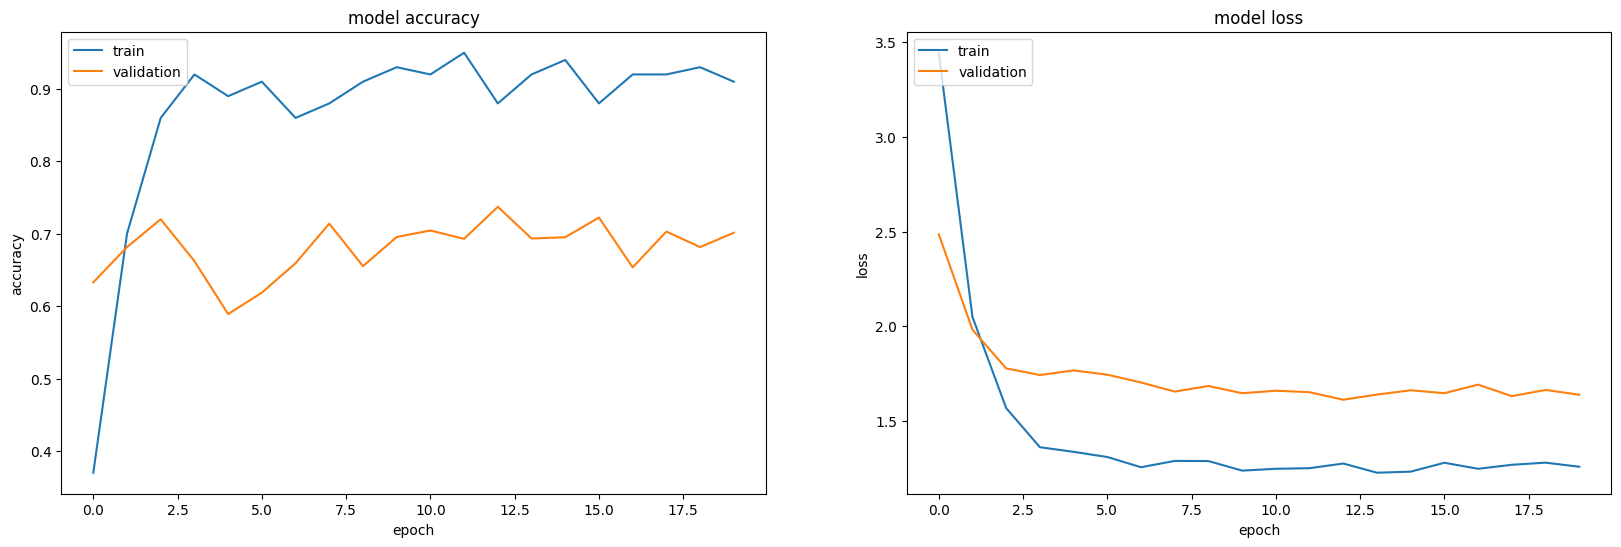

In [ ]:
batch_size = 5
epochs = 20

tensorflow.random.set_seed(0)

# lamda is the weight of the L2 penalty term
lamda = 0.1
L2_regularizer = keras.regularizers.l2(lamda)

# Model
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes,
                activation='softmax',
                kernel_regularizer=L2_regularizer))

# Training
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy'])
history_reg = model.fit(x_train_small, y_train_small,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))

# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Plot loss
print("Loss curves with regularization")
show_history(history_reg)

Questions 2.4
How do the weights of the regularized model differ from the weights of the non-regularized model?
Can you explain why?

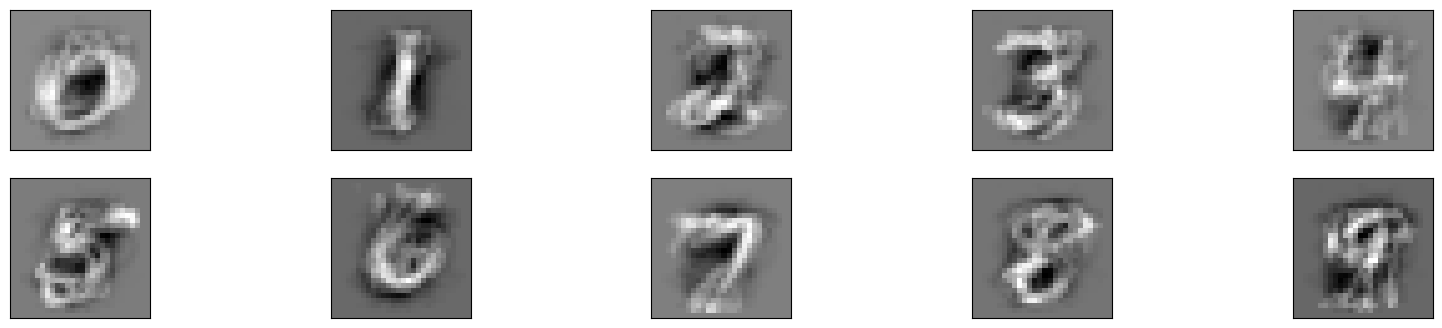

In [ ]:
layer = model.layers[1]
W = layer.get_weights()[0]
W = W.reshape((28,28,10))
plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(W[:,:,i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()


Functional API instead of Sequential API
The models above have been specified using Keras' Sequential API. Keras also allows you to specify models using the Functional API. The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

Here is how to set up the (baseline) softmax regression model using the functional API:

In [ ]:
from keras.layers import Input
from keras.models import Model

tensorflow.random.set_seed(0)

# This returns a tensor
inputs = Input(shape=input_shape)

# A layer instance is callable on a tensor, and returns a tensor
x = Flatten()(inputs)
x = Dense(num_classes)(x)
predictions = Activation('softmax')(x)

# This creates a model that includes the Input layer and the prediction layer
model = Model(inputs=inputs, outputs=predictions)

# Training
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.2663 - accuracy: 0.7044 - val_loss: 0.8057 - val_accuracy: 0.8348
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.7145 - accuracy: 0.8396 - val_loss: 0.6036 - val_accuracy: 0.8647
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5860 - accuracy: 0.8597 - val_loss: 0.5225 - val_accuracy: 0.8758
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5244 - accuracy: 0.8686 - val_loss: 0.4773 - val_accuracy: 0.8826
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4870 - accuracy: 0.8752 - val_loss: 0.4477 - val_accuracy: 0.8857
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.8794 - val_loss: 0.4266 - val_accuracy: 0.8902
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.8830 - val_loss: 0.4107 - val_accuracy: 0.8932
Epoch 

Task 3: Our first CNN
It's time to move on and build our first CNN.

Here is a simple example:

They are far less noisy



Adding the L2 penalty makes the model prefer smaller weights, eventually forcing non-used weights towards zero.
 In general, this reduces the chances of overfitting the training data

In [ ]:
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input
from keras.models import Model

tensorflow.random.set_seed(0)

inputs = Input(shape=(28, 28, 1))

# Encoder (convolutional base)
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
encoded = Flatten()(x)

# Decoder (2 fully connected layers)
x = Dense(units=64, activation='relu')(encoded)
x = Dropout(rate=0.5)(x)
predictions = Dense(units=num_classes,activation='softmax')(x)

# This creates a callable model that includes the Input layer and the prediction layer
model = Model(inputs=inputs, outputs=predictions)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 32)          4640

Questions 3.1


How many layers does this CNN have?

A: it has 10 layers where 9 are computational layers and one is simply an distribution layer(input)


How many convolution filters are there in the first convolution layer, and what is the width and height of the filters?


A: There are 8 convolutional filters , with a kernel size of 3 x 3

What does the MaxPooling2D layer do?

A runs a kernel accross the feature map and extracts the highest value of the image within the image where the kernel is located the kernel is then moved by stride size and the process is repeated. this creates a new feature map.

What does the Dropout layer do?
What is the shape of the input of the last convolution layer (i.e., just before the flatten layer)

dropout layer set som layer set som of inputs to dense_7 to zero which then gives zero value and therefore these are not included in the output

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_small, y_train_small,
                    batch_size=10,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Valdiation accuracy:', score[1])

Epoch 1/30
10/10 [==============================] - 6s 599ms/step - loss: 2.2975 - accuracy: 0.1400 - val_loss: 2.2439 - val_accuracy: 0.1650
Epoch 2/30
10/10 [==============================] - 5s 575ms/step - loss: 2.2454 - accuracy: 0.1900 - val_loss: 2.1588 - val_accuracy: 0.3271
Epoch 3/30
10/10 [==============================] - 3s 290ms/step - loss: 2.1971 - accuracy: 0.2500 - val_loss: 2.0570 - val_accuracy: 0.4038
Epoch 4/30
10/10 [==============================] - 5s 575ms/step - loss: 2.0018 - accuracy: 0.3500 - val_loss: 1.7674 - val_accuracy: 0.5149
Epoch 5/30
10/10 [==============================] - 3s 291ms/step - loss: 1.6913 - accuracy: 0.4100 - val_loss: 1.4702 - val_accuracy: 0.5911
Epoch 6/30
10/10 [==============================] - 2s 267ms/step - loss: 1.5242 - accuracy: 0.4600 - val_loss: 1.2594 - val_accuracy: 0.7141
Epoch 7/30
10/10 [==============================] - 3s 290ms/step - loss: 1.3160 - accuracy: 0.4800 - val_loss: 1.0608 - val_accuracy: 0.7000
Epoch 

Task 3.1 Encoding the MNIST dataset in 2 dimensions with a CNN
In the above model the input shape to the Flatten layer is 3x3x32, which is then flattened to a 288-dimensional vector, corresponding to the variable named encoded.

Your task is to modify the network such that variable encoded has dimensionality 2 instead of 288.

Hint: You could insert an extra layer before the Flatten layer that reduces the 3x3x32 input tensor to a 1x1x2 tensor. There are several solutions. It might be a good idea to add an activation function to the layer that you add. I used activation='tanh'. I will explain in the solution why this is a good idea.



In [ ]:

from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D

tensorflow.random.set_seed(0)

inputs = Input(shape=(28, 28, 1))

# Encoder (convolutional base)
x = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = Conv2D(2, kernel_size=(3, 3), activation='tanh')(x)
encoded = Flatten()(x)

# Decoder (2 fully connected layers)
x = Dense(64, activation='relu')(encoded)
x = Dropout(0.5)(x)
predictions = Dense(num_classes,activation='softmax')(x)

# This creates a callable model that includes the Input layer and the prediction layer
model = Model(inputs=inputs, outputs=predictions)

model.summary()


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 32)          4640

Task 3.2
Run all test examples (x_test) through your model and for each example extract the 2-dimensional vector output of the Flatten layer (variable named encoded). To make predictions on a batch of images, you can do like this: out = model_encoded.predict(batch).

Then plot those vectors in a 2D plot, where each class gets its own color.

You might find this code useful:

import numpy as np
import matplotlib.pyplot as plt

# Get 2D encoding of all test examples (in batches of 100 images)
x_test_2d = np.zeros((x_test.shape[0],2))
num_batch = int(x_test.shape[0] / 100)
for i in range(num_batch):
  batch = x_test[i*100:(i+1)*100,:,:,:]
  out = model_encoded.predict(batch)
  x_test_2d[i*100:(i+1)*100,:] = out

# Get class index for each test example
y_test_category = np.argmax(y_test,axis=1)

# Plot
for i in range(10):
  idx = np.where(y_test_category == i)
  plt.plot(x_test_2d[idx,0],x_test_2d[idx,1],'.C'+str(i))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get 2D encoding of all test examples (in batches of 100 images)
x_test_2d = np.zeros((x_test.shape[0],2))
num_batch = int(x_test.shape[0] / 100)
for i in range(num_batch):
  batch = x_test[i*100:(i+1)*100,:,:,:]
  out = model_encoded.predict(batch)
  x_test_2d[i*100:(i+1)*100,:] = out

# Get class index for each test example
y_test_category = np.argmax(y_test,axis=1)

# Plot
for i in range(10):
  idx = np.where(y_test_category == i)
  plt.plot(x_test_2d[idx,0],x_test_2d[idx,1],'.C'+str(i))

NameError: ignored

Task 4:

Convolutional Autoencoder
Autoencoders are special types of neural networks that map the input X to the same output (namely X). So the autoencoder (AE) is an identity function:

X = AE(X)
So what's the point? The point is that the autoencoder compresses the image down to a low-dimensional representation, which can be decoded again to reconstruct the original input image. This has many useful applications, such as data compression and representation learning. Only the important information is stored in the low-dimensional representation.

The autoencoder consists of a trained encoder (E) and a trained decoder (D):

X = AE(X) = D(E(X))
It is typically (but not always) the encoding E(X) that we are interested in.

Note that the autoecoder does not need the class labels to train. So it is an unsupervised machine learning technique.

Here is an example of a convolutional autoencoder:

In [ ]:
from keras.layers import UpSampling2D

tensorflow.random.set_seed(0)
inputs = Input(shape=(28, 28, 1))

# Encoder (convolutional base)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
print(("shape of encoded", K.int_shape(encoded)))

# Decoder (upsamling)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, kernel_size=(5, 5), padding='valid')(x)
print(("shape of decoded", K.int_shape(decoded)))

autoencoder = Model(inputs, decoded)
autoencoder.summary()

Questions 4.1
What is the shape of the encoded image?

A: 4x4x8


Why are we not flattening (i.e., vectorizing) the encoded image like we did in the CNN classifier above?


A: we wish to reconstruct the original image and therefore we works in 2d space. In addirion o this we ususallu flatten before dense layers, which perform verctor multiplication and now we perform 2D converlutions

What does UpSampling2D do?
it "resamples" the images to double size. with the interpolator being newarest neightbor

Why do you think upsampling is followed by a convolution? Hint: It has to do with the way we are upsampling...

because we use nearet neightbor as out interpolatir we are essentially just replecating the exiting feature map thereby effectively having a 4x4 resolutipon in an 8x8  giving a very rougid resolution we can work around this by performing convolution

See if you can figure out what padding means. What is the difference between using padding='same' and padding='valid'?
Again remember that you can carry out small experiments to get the answers.

For 'valid' the convolution kernel stays inside the input image, resulting in an output image that is smaller. For 'same' the input image is zero-padded before convolution, such that input and output have the same shape

In [ ]:
autoencoder.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=100,
               shuffle=True, validation_data=(x_test, x_test), verbose=1)

In [ ]:

decoded_imgs = autoencoder.predict(x_test)
print("input (upper row)")
show_imgs(x_test)
print("decoded (bottom row)")
show_imgs(decoded_imgs)


In [ ]:
decoded_sigmoid = Activation('sigmoid')(decoded) # decoded is the output of the first autoencoder
autoencoder2 = Model(inputs, decoded_sigmoid)
autoencoder2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy')
autoencoder2.fit(x_train, x_train, epochs=10, batch_size=100,
               shuffle=True, validation_data=(x_test, x_test), verbose=1)


Questions 4.2


What is the difference between 'mse' loss and 'binary_crossentropy' loss?


Answers
The 'mse' (mean squared error) loss is just a summation over the squared errors between y_pred and y_true [mse = sum((y_pred-y_true)^2)], whereas the binary cross entropy is [H = sum(y_true*log(y_pred) + (1-y_true)*log(1-y_pred))].


Can you explain why 'binary_crossentropy' works better?


Because of the log, errors get punished harder with binary cross entropy, which drives the model to a good solution faster compared to when using mse loss.

Task 5: Denoising Autoencoder
Autoencoders can get really advanced, like Variational Autoencoders. A slightly less complicated, yet powerful autoecoder variant is the Denoising Autoencoder.

As stated above autoencoders have many useful applications. One of these is noise reduction. The underlying idea is very simple: Add random noise to the input X, and teach the autoencoder to remove the noise. That is, the autoencoder should learn the mapping:

X = AE(X + noise)
Task 5.1
Create two new data sets based on x_train and x_test, where you have added noise such that

x_train_noisy = x_train + noise
x_test_noisy = x_test + noise
You may want to look at numpy functions like np.random.normal and np.clip.

Your tasks:

Does autoencoder2 work on the noisy images, x_test_noisy? (test it!)
Retrain autoencoder2 on the noisy images (input = x_train_noisy and output = x_train). What do you observe?

In [ ]:
# Add random noise before training!
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

show_imgs(x_test_noisy)


# denoising
print("denoising")
decoded_imgs = autoencoder2.predict(x_test_noisy)
print("input (upper row)")
show_imgs(x_test_noisy)
print("decoded (bottom row)")
show_imgs(decoded_imgs)


In [ ]:
# it takes more epochs to converge
autoencoder2.fit(x_train_noisy, x_train, epochs=10, batch_size=100,
                shuffle=True, validation_data=(x_test_noisy, x_test))

In [ ]:
# denoising
print("denoising")
decoded_imgs = autoencoder2.predict(x_test_noisy)
print("input (upper row)")
show_imgs(x_test_noisy)
print("decoded (bottom row)")
show_imgs(decoded_imgs)

In [ ]:
#Pretty cool, right?

#Of course the updated autoencoder still works on the noise-free images:


# what if we feed the original noise-free test images?
decoded_imgs = autoencoder2.predict(x_test)
print("\nof course, it works with original noise-less images")
print("input (upper row)")
show_imgs(x_test)
print("decoded (bottom row)")
show_imgs(decoded_imgs)

Task 6: Super resolution
The convolutional autoencoder is a network that maps an image to another image. There are other types of these image-to-image networks.

One example is a super resolution network. This is pretty much an autoencoder, except that the input image has lower spatial resolution than the output image. Super resolution networks learn to increase the spatial of the input image.

Your task is to modify the autoencoder such that it takes an 14x14x1 image as input and transforms it to a 28x28x1 image. Specifically, the training and test inputs should be

In [ ]:

# Low resolution images (pick every other pixel)
x_train_lowres = x_train[:,::2,::2,:] # 14x14x1
x_test_lowres = x_test[:,::2,::2,:] # 14x14x1

# Show example
print("Input low resolution images")
show_imgs(x_train_lowres)
print("Output high resolution images (target)")
show_imgs(x_train)


In [ ]:
from keras.layers import ZeroPadding2D

inputs = Input(shape=(14, 14, 1))

# Encoder (convolutional base)
x = ZeroPadding2D(padding=1)(inputs) # Zero pad from 14x14 to 16x16 (power of 2 = easier)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
print(("shape of encoded", K.int_shape(encoded)))

# Decoder (upsamling)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, kernel_size=(5, 5), activation='sigmoid', padding='valid')(x)
print(("shape of decoded", K.int_shape(decoded)))

superres = Model(inputs, decoded)
superres.summary()


superres.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy')

# it takes more epochs to converge
superres.fit(x_train_lowres, x_train, epochs=10, batch_size=100,
             shuffle=True, validation_data=(x_test_lowres, x_test))

In [ ]:

# super resolution
decoded_imgs = superres.predict(x_test_lowres)

print("input images (14x14)")
show_imgs(x_test_lowres)
print("decoded super resolution images (28x28)")
show_imgs(decoded_imgs)
print("ground truth (28x28)")
show_imgs(x_test)

The results are okay, but not great. That is because we are trying to upsample an encoded feature representation of size 4x4x8 (shape of encoded) to an image of size 28x28. The fine-grained details have been lost during the encoding process. To preserve more fine details you can add skip connections from the encoder layers to the decoder layers. This is called a U-Net:


There are many ways to implement a U-Net like architecture. It is basically all about getting the shaped of the encoder and decoder to match. Here is my implementation (note that I am giving all outputs of all encoder separate names like conv1so that I can access them later):

In [ ]:
from keras.layers import concatenate, ZeroPadding2D

inputs = Input(shape=(14, 14, 1))

# Encoder (convolutional base)
x = ZeroPadding2D(padding=1)(inputs) # Zero pad from 14x14 to 16x16 (power of 2 = easier)
conv1 = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1)
conv2 = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv2)
print(("shape of encoded", K.int_shape(encoded)))

# Decoder (upsamling)
up1 = UpSampling2D((2, 2))(pool2)
deconv1 = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(up1)
merge1 = concatenate([conv2,deconv1], axis = 3)
up2 = UpSampling2D((2, 2))(deconv1)
deconv2 = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(up2)
merge2 = concatenate([conv1,deconv2], axis = 3)
up3 = UpSampling2D((2, 2))(merge2)
decoded = Conv2D(1, kernel_size=(5, 5), activation='sigmoid', padding='valid')(up3)
print(("shape of decoded", K.int_shape(decoded)))

Unet = Model(inputs, decoded)
Unet.summary()


Unet.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy')

# it takes more epochs to converge
Unet.fit(x_train_lowres, x_train, epochs=10, batch_size=100,
             shuffle=True, validation_data=(x_test_lowres, x_test))

In [ ]:

# super resolution
decoded_imgs_unet = Unet.predict(x_test_lowres)
decoded_imgs = superres.predict(x_test_lowres)
print("input (upper row)")
show_imgs(x_test_lowres)
print("decoded with Unet")
show_imgs(decoded_imgs_unet)
print("decoded with old super resolution network (no skip connections)")
show_imgs(decoded_imgs)
print("ground truth")
show_imgs(x_test)

Task 7: Image regression
Recall that in a regression problems the output of the model is one or more scalar values, rather than class labels. Both the autoencoder and super resolution network are examples of regression models. Another example of image regression is facial landmark prediction, which can be used for emotion recognition.

In this task we will estimate the rotation angle of rotated MNIST images (but it could just as well have been estimating pixel coordinates of facial landmarks).

As a first step, we need an image generator that generates batches of randomly rotated images, along with the target rotation angles that the model should learn to predict. This code was modified from https://d4nst.github.io/2017/01/12/image-orientation/

Optional bonus task: Writing your own custom data generators is a common task in deep learning. Once you have completed the main task, consider going through the code of RotNetDataGenerator and see if you can figure out how it works (notice that its base class is keras.preprocessing.image.Iterator).

In [ ]:

from keras.preprocessing.image import Iterator
from keras.utils.np_utils import to_categorical
import cv2

class RotNetDataGenerator(Iterator):

    def __init__(self, input, batch_size=64,
                 preprocess_func=None, shuffle=False):

        self.images = input
        self.batch_size = batch_size
        self.input_shape = self.images.shape[1:]
        self.preprocess_func = preprocess_func
        self.shuffle = shuffle

        # add dimension if the images are greyscale
        if len(self.input_shape) == 2:
            self.input_shape = self.input_shape + (1,)
        N = self.images.shape[0]

        super(RotNetDataGenerator, self).__init__(N, batch_size, shuffle, None)

    def _get_batches_of_transformed_samples(self, index_array):
        # create array to hold the images
        batch_x = np.zeros((len(index_array),) + self.input_shape, dtype='float32')
        # create array to hold the labels
        batch_y = np.zeros(len(index_array), dtype='float32')

        # iterate through the current batch
        for i, j in enumerate(index_array):

            image = self.images[j].squeeze()

            # get a random angle
            rotation_angle = np.random.randint(-30,30)

            # rotate the image
            rows,cols = image.shape
            M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),rotation_angle,1)
            rotated_image = cv2.warpAffine(image,M,(cols,rows))

            # add dimension to account for the channels if the image is greyscale
            if rotated_image.ndim == 2:
                rotated_image = np.expand_dims(rotated_image, axis=2)

            # store the image and label in their corresponding batches
            batch_x[i] = rotated_image
            batch_y[i] = rotation_angle

        # preprocess input images
        if self.preprocess_func:
            batch_x = self.preprocess_func(batch_x)

        return batch_x, batch_y

    def next(self):
        with self.lock:
            # get input data index and size of the current batch
            index_array = next(self.index_generator)
        # create array to hold the images
        return self._get_batches_of_transformed_samples(index_array)

In [ ]:
# Instantiate
datagen = RotNetDataGenerator(
        x_train,
        batch_size=32,
        preprocess_func=None,
        shuffle=False
    )

# Generate batch
rotated_images, angles = datagen.next()

# Display
print("Images (before rotation)")
show_imgs(x_train)
print("Images after random rotation")
show_imgs(rotated_images)

Task 7.1


Make a small CNN that takes as input an 28x28x1 image and outputs a single scalar value (the rotation angle).

The last layer of your network should be

angle = Dense(1)(x)
Note that this is a dense layer without any activation function, hence the output of this layer is simply angle = W*x + b.

In [ ]:
inputs = Input(shape=(28, 28, 1))

# Encoder (convolutional base)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='valid')(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='valid')(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='valid')(x)

# Decoder (predic angle)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
angle = Dense(1)(x) # W*x + b

angle_estimator = Model(inputs, angle)

angle_estimator.summary()


In [ ]:
angle_estimator.compile(optimizer='rmsprop',loss='mse')

# training loop
angle_estimator.fit_generator(
    RotNetDataGenerator(
        x_train,
        batch_size=100,
        preprocess_func=None,
        shuffle=True
    ),
    epochs=50,
    validation_data=RotNetDataGenerator(
        x_test,
        batch_size=100,
        preprocess_func=None))

In [ ]:
# Set up generator
datagen = RotNetDataGenerator(
        x_test,
        batch_size=32,
        preprocess_func=None,
        shuffle=False
    )

# Generate test images
rotated_images, angles = datagen.next()
print("Test images before rotation")
show_imgs(x_test)
print("Test images after rotation")
show_imgs(rotated_images)

# Predict angles
angles_pred = angle_estimator.predict(rotated_images)

# Plot angles
print('Predicted vs. true rotation angles')
plt.plot(angles)
plt.plot(angles_pred)
plt.legend(['True','Predicted']);
plt.xlabel('Test image')
plt.ylabel('Rotation angle')


In [ ]:

de_rotated_images = np.zeros(rotated_images.shape)

for i in range(rotated_images.shape[0]):
  image = rotated_images[i,:,:,:].squeeze()

  # get predicted angle
  rotation_angle = -angles_pred[i]

  # rotate the image
  rows,cols = image.shape
  M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),float(rotation_angle),1)
  de_rotated_image = cv2.warpAffine(image,M,(cols,rows))

  de_rotated_images[i,:,:,0] = de_rotated_image

print('Images before rotation (ground truth)')
show_imgs(x_test)
print('Images after rotation (to be de-rotated)')
show_imgs(rotated_images)
print('De-rotated images (should match ground truth)')
show_imgs(de_rotated_images)

Task 8: Object detection
Motivation: Classification CNNs assign one label to each input image. This is problematic if the image contains multiple objects.

Object detection is about detecting and classifying multiple objects in images. Object detection networks output the corner coordinates of the bounding box of each detect object, along with a class label.

There are many ways to implement object detection with CNNs. At some point you may want to take a look at this 3-part tutorial:

https://towardsdatascience.com/beginners-guide-to-object-detection-algorithms-6620fb31c375
https://www.analyticsvidhya.com/blog/2018/11/implementation-faster-r-cnn-python-object-detection/?utm_source=blog&utm_medium=a-step-by-step-introduction-to-the-basic-object-detection-algorithms-part-1
https://www.analyticsvidhya.com/blog/2018/12/practical-guide-object-detection-yolo-framewor-python/?utm_source=blog&utm_medium=implementation-faster-r-cnn-python-object-detection
The basic idea of our simple object detector below is as follows:

The output image is divided into a 2-by-2 grid
Each grid cell can contain one object, or no object. We want our model to output whether it thinks there is an object in the cell or not.
If a cell contains an object, we want our model to output the corner coordinates of the bounding box (relative to the center of the grid cell).
Also, if there is an object in a cell, we want to predict its class label.
If the input image has shape 64x64, the output of the model will have shape 2x2x15:

1 output per cell for the confidence (is there an object or not?)
4 outputs per cell corresponding to the upper left and lower right coordinates of the bounding box
10 outputs per cell corresponding to the class probabalities (assuming we have 10 classes).
This totals 15 outputs per cell.

Comment
The network architecture below is somewhat inspired by YOLO:



In [ ]:

from keras.layers import concatenate
from keras.activations import softmax

def softMaxAxis3(x):
    return softmax(x,axis=3)

input_img = Input(shape=(64, 64, 1))

x = Conv2D(8, 33, activation='relu', padding='same')(input_img) #nb_filter, nb_row, nb_col
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Notice that all three outputs use the same encoder

# 1. This predicts whether there is an object in a cell or not
x = Conv2D(4, 3, activation='relu', padding='same')(encoded)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
confidence = Conv2D(1, 1, activation='sigmoid', padding='same')(x)

# 2. This predicts the bounding box coordinates for each cell
x = Conv2D(4, 3, activation='relu', padding='same')(encoded)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
box = Conv2D(4, 1, padding='same')(x)

# 3. This predicts the class probabilities for each cell
x = Conv2D(16, 3, activation='relu', padding='same')(encoded)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
classes = Conv2D(num_classes, 1, activation=softMaxAxis3, padding='same')(x)

# Merge output
merged = concatenate([confidence, box, classes])

objdet = Model(input_img, merged)
objdet.compile(optimizer='rmsprop', loss='mse')

objdet.summary()

Quesions 8.1
What does softMaxAxis3 do, and why is it needed?
Answers
The output tensor (merged) has shape 2x2x15 with

1 output per cell for the confidence (is there an object or not?)
4 outputs per cell corresponding to the upper left and lower right coordinates of the bounding box
10 outputs per cell corresponding to the class probabalities (assuming we have 10 classes).
The latter corresponds to the tensor classes, which has shape 2x2x10. During optimization we perform softmax regression on this guy, but along which dimension? Along the third dimension. That's what softMaxAxis3 is used for.

Training data
Let's generate some training data for our object detector.

The training images (x_train_obj) will be 64x64, where two of the four quadrants will contain one handwritten digit. This just serves to illustrate that we can teach a network to detect and classify more than one digit per input image.

The output is (y_train_obj) is 2x2x15 as explained above:

1 output per cell for the confidence (is there an object or not?)
4 outputs per cell corresponding to the upper left and lower right coordinates of the bounding box
10 outputs per cell corresponding to the class probabalities (assuming we have 10 classes).

In [ ]:
x_train_obj = np.zeros((5000,64,64,1))
y_train_obj = np.zeros((5000,2,2,15))

for i in range(5000):

  ## 1
  q = np.random.randint(0,2) # 1st or 2nd image quadrant?

  # Random image
  rand_ix = np.random.randint(0,x_train.shape[0])
  x_off_start = np.random.randint(0,5)
  y_off_start = np.random.randint(0,5)
  x_train_obj[i,0+x_off_start:28+x_off_start,32*q+y_off_start:32*q+28+y_off_start,:] = x_train[rand_ix,:,:,:]

  # Set confidence to 1
  y_train_obj[i,0,q,0] = 1

  # Class label
  label = np.argmax(y_train[rand_ix,:])
  y_train_obj[i,0,q,5+label] = 1

  # Bounding box corners coordinates
  tmp = x_train[rand_ix,:,:,:]
  ix = np.where(tmp>0.1)
  rows = ix[0]
  cols = ix[1]
  y_train_obj[i,0,q,1] = np.min(rows) + x_off_start
  y_train_obj[i,0,q,2] = np.min(cols) + y_off_start
  y_train_obj[i,0,q,3] = np.max(rows) + x_off_start
  y_train_obj[i,0,q,4] = np.max(cols) + y_off_start

  ## 2
  q = np.random.randint(0,2) # 3rd or 4rd image quadrant?

  # Random image
  rand_ix = np.random.randint(0,x_train.shape[0])
  x_off_start = np.random.randint(0,5)
  y_off_start = np.random.randint(0,5)
  x_train_obj[i,32+x_off_start:32+28+x_off_start,32*q+y_off_start:32*q+28+y_off_start,:] = x_train[rand_ix,:,:,:]

  # Set confidence to 1
  y_train_obj[i,1,q,0] = 1

  # Class label
  label = np.argmax(y_train[rand_ix,:])
  y_train_obj[i,1,q,5+label] = 1

  # Bounding box corners coordinates
  tmp = x_train[rand_ix,:,:,:]
  ix = np.where(tmp>0.1)
  rows = ix[0]
  cols = ix[1]
  y_train_obj[i,1,q,1] = np.min(rows) + x_off_start
  y_train_obj[i,1,q,2] = np.min(cols) + y_off_start
  y_train_obj[i,1,q,3] = np.max(rows) + x_off_start
  y_train_obj[i,1,q,4] = np.max(cols) + y_off_start

In [ ]:
import cv2
plt.figure(figsize=(20,4))
for k in range(10):
  result = np.tile(x_train_obj[k,:,:,:],(1,1,3))

  for i in range(2):
    for j in range(2):
      object_present = np.round(y_train_obj[k,i,j,0])
      if object_present:
        class_index = np.argmax(y_train_obj[k,i,j,5:])
        xmin = int(y_train_obj[k,i,j,1] + i*32) # row
        ymin = int(y_train_obj[k,i,j,2] + j*32) # col
        xmax = int(y_train_obj[k,i,j,3] + i*32) # row
        ymax = int(y_train_obj[k,i,j,4] + j*32) # col
        cv2.rectangle(result,(ymin,xmin),(ymax,xmax),(0,1,0),1)
        cv2.putText(result, str(class_index), (ymin-10, xmin+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 1, 0),lineType=cv2.LINE_AA)
  ax = plt.subplot(2,5,k+1)
  plt.imshow(result)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


objdet.fit(x_train_obj, y_train_obj, epochs=100, batch_size=128,shuffle=True,verbose=1)

In [ ]:

out = objdet.predict(x_train_obj[0:10,:,:,:])

plt.figure(figsize=(20,4))
for k in range(10):
  result = np.tile(x_train_obj[k,:,:,:],(1,1,3))

  for i in range(2):
    for j in range(2):
      object_present = np.round(out[k,i,j,0])
      if object_present:
        class_index = np.argmax(out[k,i,j,5:])
        xmin = int(out[k,i,j,1] + i*32) # row
        ymin = int(out[k,i,j,2] + j*32) # col
        xmax = int(out[k,i,j,3] + i*32) # row
        ymax = int(out[k,i,j,4] + j*32) # col
        cv2.rectangle(result,(ymin,xmin),(ymax,xmax),(0,1,0),1)
        cv2.putText(result, str(class_index), (ymin-10, xmin+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 1, 0),lineType=cv2.LINE_AA)
  ax = plt.subplot(2,5,k+1)
  plt.imshow(result)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

Task 9: Image segmentation
Image segmentation is a form of image-to-image transformation. It outputs a softmax classification per pixel. So if the input image has size 64x64, and there are 10 classes, the output will have shape 64x64x10. That is, for each pixel the network outputs a vector of class probabilities:

alt text

Let's first make a new training set.

Training images
The training images (x_train_seg) will be 64x64, where two of the four quadrants will contain one handwritten digit. This is to illustrate that we can teach a network to identify and segment more than one digit per input image.

The target output (y_train_seg) will be 64x64x10, with a one-hot vector for each pixel indicating the correct class.

In [ ]:
from keras.layers import concatenate, BatchNormalization

# See last layer of network
def softMaxAxis3(x):
    return softmax(x,axis=3)

def my_conv(x,filters,kernel_size=3,padding='same',kernel_initializer='he_normal'):
  x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=kernel_initializer)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  return x

inputs = Input(shape=(64, 64, 1))

# Encoder
conv1 = my_conv(inputs,filters=8)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = my_conv(pool1,filters=16)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = my_conv(pool2,filters=32)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = my_conv(pool3,filters=64)

# Decoder
up7 = my_conv(conv4,filters=32)
up7 = UpSampling2D(size = (2,2))(up7)
merge7 = concatenate([conv3,up7], axis = 3)
up8 = my_conv(merge7,filters=16)
up8 = UpSampling2D(size = (2,2))(up8)
merge8 = concatenate([conv2,up8], axis = 3)
up9 = my_conv(merge8,filters=8)
up9 = UpSampling2D(size = (2,2))(up9)
merge9 = concatenate([conv1,up9], axis = 3)

# Perform softmax on each pixel, so axis should be 3 because output has shape: batch_size x 64 x 64 x num_classes
conv11 = Conv2D(num_classes, 1, activation = softMaxAxis3)(merge9)

model = Model(inputs, conv11)
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.01), loss = 'mse')


Questions 9.1
What does "concatenate" do?
Which pairs of layers of the encoder and decoder are being concatenated?
Why do you think U-Net concatenates outputs from layers of the encoder and layers of the decoder?
Hint: Use K.int_shape(...) to get the shapes of the layers that are being concatenated

Answers
It merges two or more layers along a specified axis. For instance
conv3 (None, 16, 16, 32)
and
up7 (None, 16, 16, 32)
are merged into
merge7 (None, 16, 16, 64)
Layers are being paired from either end of the network. First convolutional layer goes with last upsamling layer (merge9 = conv1 + up9), second convolutional layer goes with second to last upsampling layer (merge8 = conv2 + up8), etc.
As the input image gets processed through the convolutional layers of the encoder, the spatial resolution is decreased, and information about fine image details is therefore lost. With the concatenation layers, high spatial information from encoder layers are feed directly to the decoder layers, helping it to reconstruct an output that maintain fine image details. See for yourself in the example below, where the concat layers have been removed.

In [ ]:
# merge7 = concatenate([conv3,up7], axis = 3)
print('conv3',K.int_shape(conv3))
print('up7',K.int_shape(up7))
print('merge7',K.int_shape(merge7))
# merge8 = concatenate([conv2,up8], axis = 3)
print('conv2',K.int_shape(conv2))
print('up8',K.int_shape(up8))
print('merge8',K.int_shape(merge8))
# merge9 = concatenate([conv1,up9], axis = 3)
print('conv1',K.int_shape(conv1))
print('up9',K.int_shape(up9))
print('merge9',K.int_shape(merge9))


In [ ]:
model.fit(x_train_seg, y_train_seg, epochs=20, batch_size=64, shuffle=True, verbose=1)



In [ ]:
# Pick 4 random examples
rand_ix = np.random.randint(0,5000,4)
out = model.predict(x_train_seg[rand_ix,:,:,:])
ref = y_train_seg[rand_ix,:,:,:].squeeze()
for k in range(4):
  plt.figure(figsize=(20,4))
  plt.subplot(2,11,1)
  plt.imshow(x_train_seg[rand_ix[k],:,:,:].squeeze())
  plt.title('Input image')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  for i in range(10):
    ax = plt.subplot(2,11,i+2)
    plt.imshow(out[k,:,:,i].squeeze(),vmin=0,vmax=1)
    plt.title('Predicted ' + str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2,11,11+i+2)
    plt.imshow(ref[k,:,:,i].squeeze(),vmin=0,vmax=1)
    plt.title('Ground truth ' + str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Task 9.1
Remove the concatenation layers (i.e., fill in the empty slots marked with ???). Then run the code block and train the model.

In [ ]:
inputs = Input(shape=(64, 64, 1))

# Encoder
conv1 = my_conv(inputs,filters=8)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = my_conv(pool1,filters=16)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = my_conv(pool2,filters=32)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = my_conv(pool3,filters=64)

# Decoder
up7 = my_conv(conv4,filters=32)
up7 = UpSampling2D(size = (2,2))(up7)
#merge7 = concatenate([conv3,up7], axis = 3)
up8 = my_conv(up7,filters=16)
up8 = UpSampling2D(size = (2,2))(up8)
#merge8 = concatenate([conv2,up8], axis = 3)
up9 = my_conv(up8,filters=8)
up9 = UpSampling2D(size = (2,2))(up9)
#merge9 = concatenate([conv1,up9], axis = 3)

# Perform softmax on each pixel, so axis should be 3 because output has shape: batch_size x 64 x 64 x num_classes
conv11 = Conv2D(num_classes, 1, activation = softMaxAxis3)(up9)

model = Model(inputs, conv11)
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.01), loss = 'mse')


In [ ]:
model.fit(x_train_seg, y_train_seg, epochs=20, batch_size=64, shuffle=True, verbose=1)



Questions 9.2
The results look more blurry without the concatenation layers. Can you come up with an explanation why that is?
Answers
Fine image details are lost in the convolution layers of the encoder, as explained above.